# Inspect BAO template and codes

Build a template

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from desilike import setup_logging
from desilike.theories.galaxy_clustering import BAOPowerSpectrumTemplate, DampedBAOWigglesTracerPowerSpectrumMultipoles

# --- Setup ---
setup_logging()

# Cosmology & templates
z = 0.3
template_w = BAOPowerSpectrumTemplate(z=z, fiducial='DESI', apmode='qiso')
template_now = BAOPowerSpectrumTemplate(z=z, fiducial='DESI', apmode='qiso', only_now=True)

# --- Initialize theories ---
theory_w = DampedBAOWigglesTracerPowerSpectrumMultipoles(template=template_w, ells=(0,))
theory_w.init.update(broadband='pcs')

theory_now = DampedBAOWigglesTracerPowerSpectrumMultipoles(template=template_now, ells=(0,))
theory_now.init.update(broadband='pcs')

# --- Parameters ---
b1 = 2.0
qiso = 1.0

/n/home12/cgarciaquintero/.conda/envs/cosmodesi/lib/python3.10/site-packages/cosmoprimo/eisenstein_hu.py:25: UserWarning: EisensteinHuNoWiggleEngine cannot cope with massive neutrinos
  warnings.warn('{} cannot cope with massive neutrinos'.format(self.__class__.__name__))


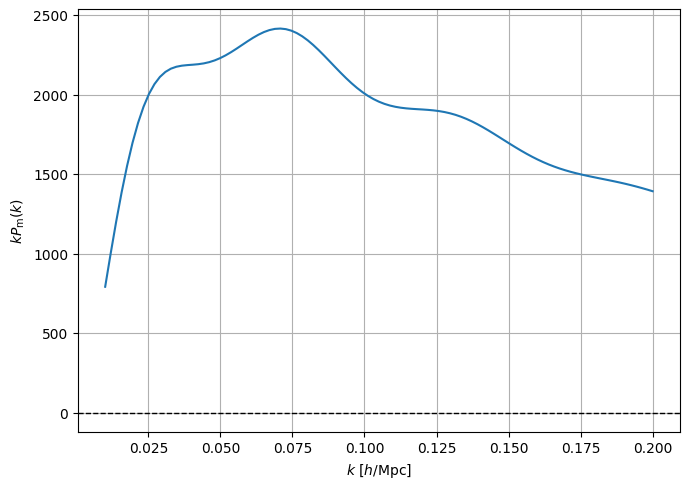

In [2]:
# --- Plot ---
fig, ax = plt.subplots(figsize=(7, 5))

# no-wiggle baseline (no damping needed)
pk_now = theory_now(qiso=qiso, b1=b1)
pk = theory_w(qiso=qiso, b1=b1)
ax.plot(theory_w.k, theory_w.k*pk[0])

ax.axhline(1, color='k', linestyle='--', lw=1)  # reference line at 1
ax.set_xlabel(r'$k\ [h/\mathrm{Mpc}]$')
ax.set_ylabel(r'$kP_\mathrm{m}(k)$')
#ax.set_title(r'BAO Monopole - $P_0/P_0^{\rm no\,wiggle}$')
ax.grid(True)
plt.tight_layout()
plt.show()

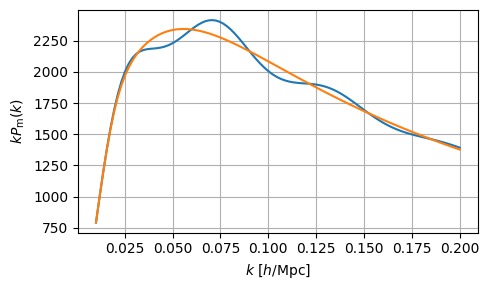

In [3]:
# --- Plot ---
fig, ax = plt.subplots(figsize=(5, 3))

# no-wiggle baseline (no damping needed)
pk_now = theory_now(qiso=qiso, b1=b1)
pk = theory_w(qiso=qiso, b1=b1)
ax.plot(theory_w.k, theory_w.k*pk[0])
ax.plot(theory_now.k, theory_now.k*pk_now[0])
ax.set_xlabel(r'$k\ [h/\mathrm{Mpc}]$')
ax.set_ylabel(r'$kP_\mathrm{m}(k)$')
#ax.set_title(r'BAO Monopole - $P_0/P_0^{\rm no\,wiggle}$')
ax.grid(True)
plt.tight_layout()
plt.show()

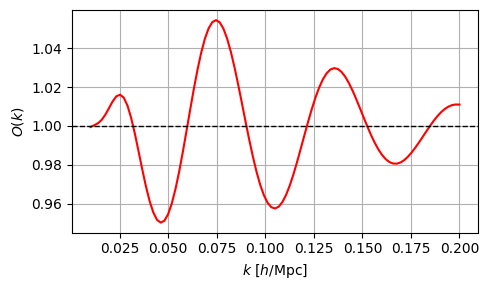

In [4]:
# --- Plot ---
fig, ax = plt.subplots(figsize=(5, 3))

# no-wiggle baseline (no damping needed)
pk_now = theory_now(qiso=qiso, b1=b1)[0]
pk = theory_w(qiso=qiso, b1=b1)[0]
ax.plot(theory_now.k, pk/pk_now, color='r')

ax.axhline(1, color='k', linestyle='--', lw=1)  # reference line at 1
ax.set_xlabel(r'$k\ [h/\mathrm{Mpc}]$')
ax.set_ylabel(r'$O(k)$')
#ax.set_title(r'BAO Monopole - $P_0/P_0^{\rm no\,wiggle}$')
ax.grid(True)
plt.tight_layout()
plt.show()

Isolating BAO feature

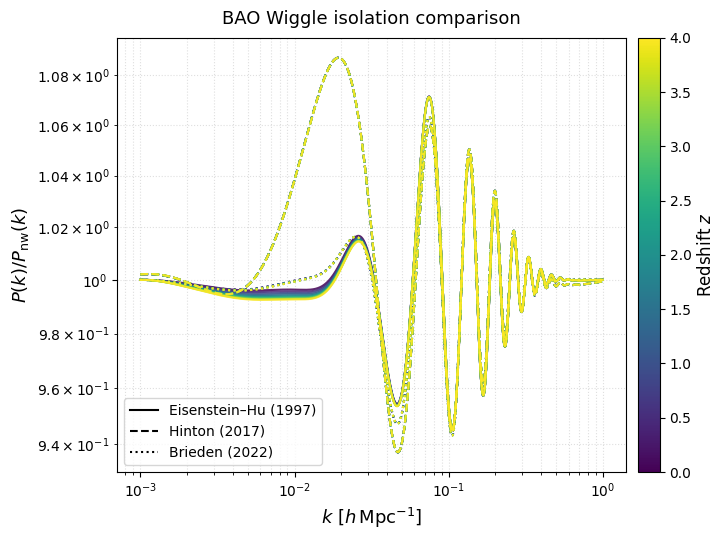

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from cosmoprimo import Fourier, PowerSpectrumBAOFilter
from cosmoprimo.fiducial import DESI

# --- Cosmology setup ---
cosmo = DESI()
fo = Fourier(cosmo, engine='class')
pk = fo.pk_interpolator()
pknow_EH = PowerSpectrumBAOFilter(pk, engine='ehpoly').smooth_pk_interpolator()
pknow_Hinton = PowerSpectrumBAOFilter(pk, engine='hinton2017', cosmo=cosmo, cosmo_fid=cosmo).smooth_pk_interpolator()
pknow_Brieden = PowerSpectrumBAOFilter(pk, engine='peakaverage', cosmo=cosmo, cosmo_fid=cosmo).smooth_pk_interpolator()

# --- k and z arrays ---
k = np.logspace(-3, 0, 1000)
z = np.linspace(0., 4., 10)

# --- Colormap setup ---
cmap = plt.cm.viridis
colors = cmap(np.linspace(0, 1, len(z)))

# --- Plot ---
fig, ax = plt.subplots(figsize=(7.5, 5.5))
for zz, color in zip(z, colors):
    ax.loglog(k, pk(k, z=zz) / pknow_EH(k, z=zz), '-', color=color, alpha=0.85)
    ax.loglog(k, pk(k, z=zz) / pknow_Hinton(k, z=zz), '--', color=color, alpha=0.85)
    ax.loglog(k, pk(k, z=zz) / pknow_Brieden(k, z=zz), ':', color=color, alpha=0.85)

# --- Collect handles for legend (use the same colors/linestyles) ---
from matplotlib.lines import Line2D
handles = [
    Line2D([0], [0], color='k', linestyle='-', label='Eisenstein–Hu (1997)'),
    Line2D([0], [0], color='k', linestyle='--', label='Hinton (2017)'),
    Line2D([0], [0], color='k', linestyle=':', label='Brieden (2022)')
]

ax.legend(handles=handles, loc='lower left', frameon=True)

# --- Add colorbar for redshift ---
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=z.min(), vmax=z.max()))
cbar = fig.colorbar(sm, ax=ax, pad=0.02)
cbar.set_label(r'Redshift $z$', fontsize=12)

# --- Labels, legend, and style tweaks ---
ax.set_xlabel(r'$k$ [$h\,\mathrm{Mpc}^{-1}$]', fontsize=13)
ax.set_ylabel(r'$P(k)/P_{\mathrm{nw}}(k)$', fontsize=13)
ax.set_title(r'BAO Wiggle isolation comparison', fontsize=13, pad=10)
ax.grid(True, which='both', ls=':', alpha=0.4)
#ax.set_xlim(1e-3, 1)
#ax.set_ylim(0.9, 1.2)

plt.tight_layout()
plt.show()

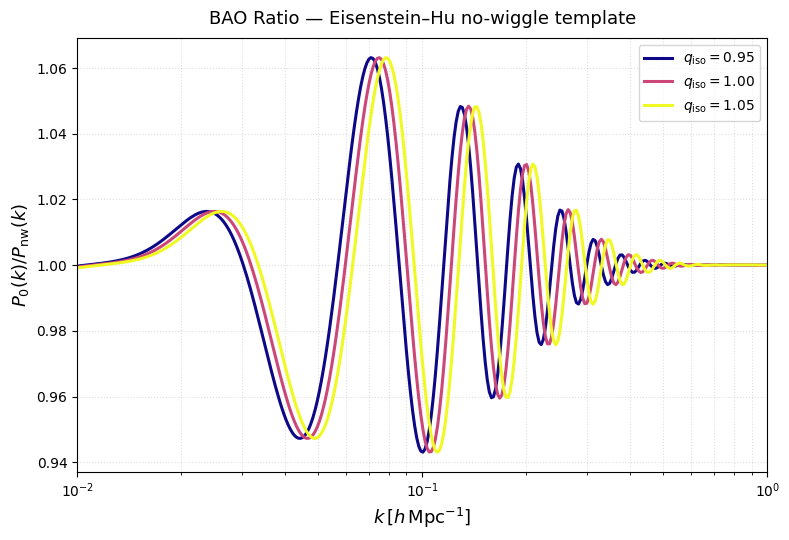

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from desilike import setup_logging
from desilike.theories.galaxy_clustering import (
    BAOPowerSpectrumTemplate,
    FlexibleBAOWigglesTracerPowerSpectrumMultipoles
)

# --- Setup ---
setup_logging()

# --- Cosmology & templates ---
z = 0.3
template = BAOPowerSpectrumTemplate(z=z, fiducial='DESI', apmode='qiso')
template_now = BAOPowerSpectrumTemplate(z=z, fiducial='DESI', apmode='qiso', only_now=True)

# --- Custom k-array (denser grid) ---
k = np.logspace(-3, 0, 500)

# --- Define BAO theories with custom k-grid ---
theory = FlexibleBAOWigglesTracerPowerSpectrumMultipoles(
    template=template,
    ells=(0,),
    broadband='power',
    wiggles='pcs',
    k=k                     # 👈 custom sampling here
)

theory_nw = FlexibleBAOWigglesTracerPowerSpectrumMultipoles(
    template=template_now,
    ells=(0,),
    broadband='power',
    wiggles='pcs',
    k=k                     # 👈 must match for the ratio
)

# --- Parameters & plot ---
b1 = 2.0
alphas = [0.95, 1.00, 1.05]
colors = plt.cm.plasma(np.linspace(0, 1, len(alphas)))

fig, ax = plt.subplots(figsize=(8, 5.5))
for alpha, color in zip(alphas, colors):
    pk_ratio = (theory(qiso=alpha, b1=b1)[0] /
                theory_nw(qiso=alpha, b1=b1)[0])
    ax.plot(k, pk_ratio, color=color, lw=2.2,
            label=fr'$q_\mathrm{{iso}} = {alpha:.2f}$')

ax.set_xscale('log')
ax.set_xlabel(r'$k\,[h\,\mathrm{Mpc}^{-1}]$', fontsize=13)
ax.set_ylabel(r'$P_0(k)/P_{\mathrm{nw}}(k)$', fontsize=13)
ax.set_title(r'BAO Ratio — Eisenstein–Hu no-wiggle template', fontsize=13, pad=10)
ax.grid(True, which='both', ls=':', alpha=0.4)
ax.legend()
ax.set_xlim(1e-2, 1.0)
plt.tight_layout()
plt.show()

Effect of alpha's 

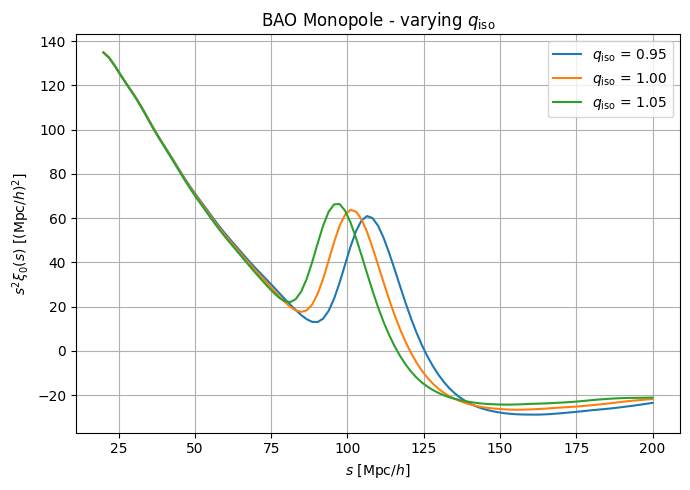

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from desilike import setup_logging
from desilike.theories.galaxy_clustering import BAOPowerSpectrumTemplate, FlexibleBAOWigglesTracerCorrelationFunctionMultipoles

# --- Setup ---
setup_logging()

# Cosmology & template
z = 0.3
template = BAOPowerSpectrumTemplate(z=z, fiducial='DESI', apmode='qiso')  # isotropic scaling

# Define BAO theory for xi_ell
theory = FlexibleBAOWigglesTracerCorrelationFunctionMultipoles(
    template=template,
    ells=(0,),             # monopole only
    broadband='pcs2',
    wiggles='pcs'
)

# --- Parameters ---
b1 = 2.0
alphas = [0.95, 1.0, 1.05]  # qiso values

# --- Plot ---
plt.figure(figsize=(7, 5))
for alpha in alphas:
    xi = theory(qiso=alpha, b1=b1)      # <-- pass scalar
    plt.plot(theory.s, theory.s**2 * xi[0], label=fr'$q_\mathrm{{iso}}$ = {alpha:.2f}')

# Styling
plt.xlabel(r'$s\ [\mathrm{Mpc}/h]$')
plt.ylabel(r'$s^2 \xi_0(s)\ [(\mathrm{Mpc}/h)^2]$')
plt.title('BAO Monopole - varying $q_\mathrm{iso}$')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

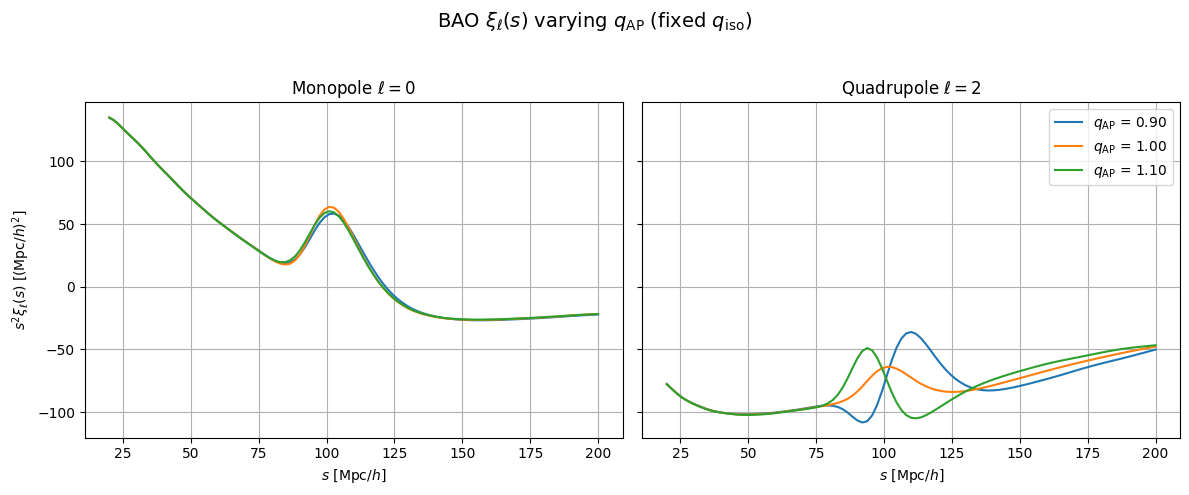

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from desilike import setup_logging
from desilike.theories.galaxy_clustering import BAOPowerSpectrumTemplate, FlexibleBAOWigglesTracerCorrelationFunctionMultipoles

# --- Setup ---
setup_logging()

# Cosmology & template
z = 0.3
template = BAOPowerSpectrumTemplate(z=z, fiducial='DESI', apmode='qisoqap')

# Define BAO theory with monopole (ℓ=0) and quadrupole (ℓ=2)
theory = FlexibleBAOWigglesTracerCorrelationFunctionMultipoles(
    template=template,
    ells=(0, 2),
    broadband='pcs2',
    wiggles='pcs'
)

# --- Parameters ---
b1 = 2.0
qiso = 1.0
qap_values = [0.9, 1.0, 1.1]  # AP distortion values

# --- Plot ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
fig.subplots_adjust(wspace=0.25)

ells = [0, 2]
titles = [r'Monopole $\ell=0$', r'Quadrupole $\ell=2$']

for i, ell in enumerate(ells):
    ax = axes[i]
    for qap in qap_values:
        xi = theory(qiso=qiso, qap=qap, b1=b1)
        ax.plot(theory.s, theory.s**2 * xi[i], label=fr'$q_\mathrm{{AP}}$ = {qap:.2f}')
    ax.set_title(titles[i])
    ax.set_xlabel(r'$s\ [\mathrm{Mpc}/h]$')
    ax.grid(True)

axes[0].set_ylabel(r'$s^2 \xi_\ell(s)\ [(\mathrm{Mpc}/h)^2]$')
axes[1].legend()
plt.suptitle(r'BAO $\xi_\ell(s)$ varying $q_\mathrm{AP}$ (fixed $q_\mathrm{iso}$)', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Effect of damping parameters

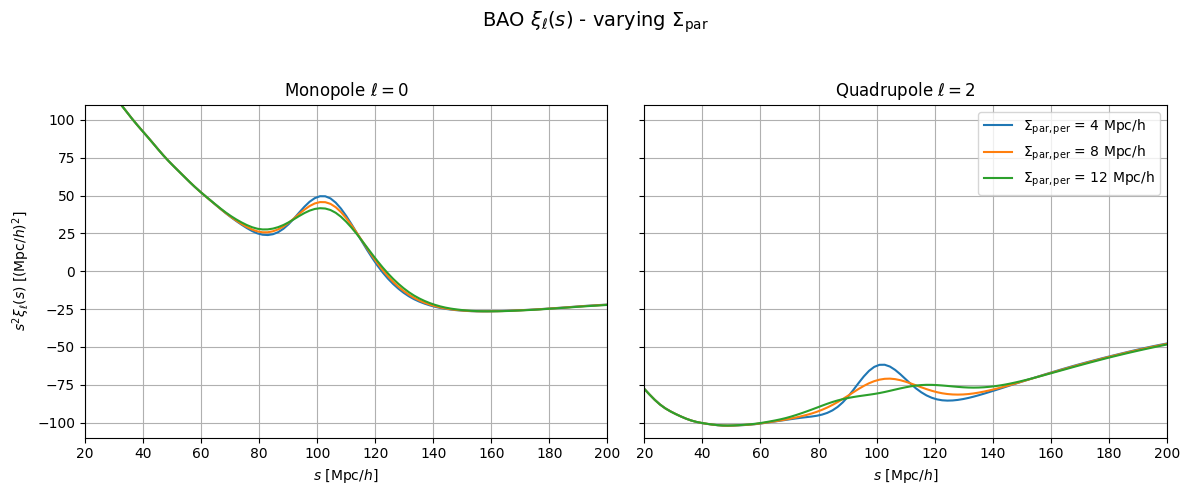

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from desilike import setup_logging
from desilike.theories.galaxy_clustering import BAOPowerSpectrumTemplate, DampedBAOWigglesTracerCorrelationFunctionMultipoles

# --- Setup ---
setup_logging()

# Cosmology & template
z = 0.3
template = BAOPowerSpectrumTemplate(z=z, fiducial='DESI', apmode='qiso')

# Define BAO theory with damping (Σ_par, Σ_per)
theory = DampedBAOWigglesTracerCorrelationFunctionMultipoles(
    template=template,
    ells=(0, 2),           # include monopole and quadrupole
    broadband='pcs2',
)

# --- Parameters ---
b1 = 2.0
qiso = 1.0
Sigma_par_fid = 8
Sigma_per_fid = 8
Sigma_par = [4., 8., 12.]  # in Mpc/h

# --- Plot ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
fig.subplots_adjust(wspace=0.25)
ells = [0, 2]
titles = [r'Monopole $\ell = 0$', r'Quadrupole $\ell = 2$']

for i, ell in enumerate(ells):
    ax = axes[i]
    for Sigma in Sigma_par:
        xi = theory(qiso=qiso, b1=b1, sigmapar=Sigma, sigmaper=Sigma_per_fid)
        ax.plot(theory.s, theory.s**2 * xi[i], label=fr'$\Sigma_{{\rm par,per}}$ = {Sigma:.0f} Mpc/h')
    ax.set_title(titles[i])
    ax.set_xlabel(r'$s\ [\mathrm{Mpc}/h]$')
    ax.set_xlim([20,200])
    ax.set_ylim([-110,110])
    ax.grid(True)

axes[0].set_ylabel(r'$s^2 \xi_\ell(s)\ [(\mathrm{Mpc}/h)^2]$')
axes[1].legend()
plt.suptitle(r'BAO $\xi_\ell(s)$ - varying $\Sigma_\mathrm{par}$', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

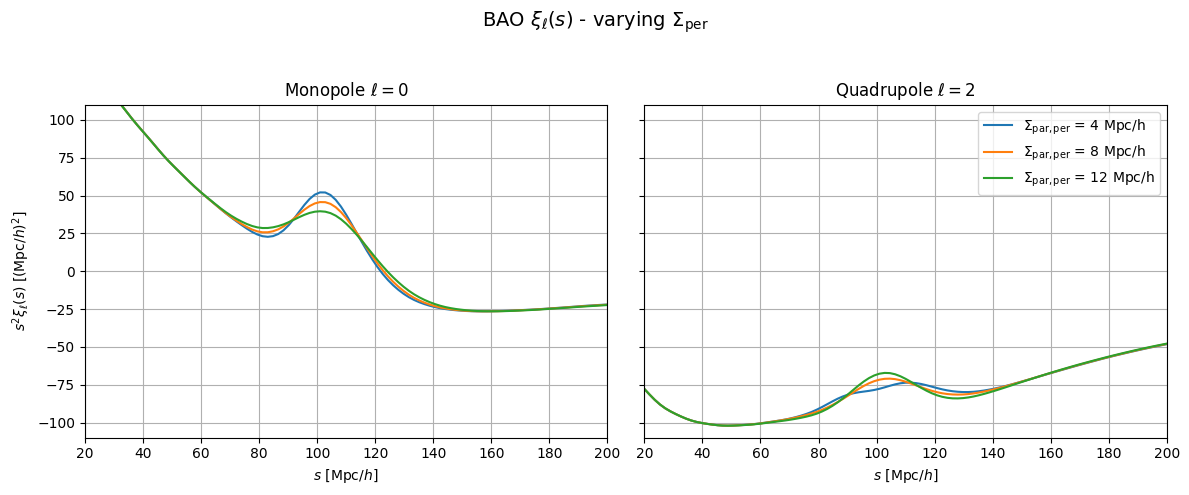

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from desilike import setup_logging
from desilike.theories.galaxy_clustering import BAOPowerSpectrumTemplate, DampedBAOWigglesTracerCorrelationFunctionMultipoles

# --- Setup ---
setup_logging()

# Cosmology & template
z = 0.3
template = BAOPowerSpectrumTemplate(z=z, fiducial='DESI', apmode='qiso')

# Define BAO theory with damping (Σ_par, Σ_per)
theory = DampedBAOWigglesTracerCorrelationFunctionMultipoles(
    template=template,
    ells=(0, 2),           # include monopole and quadrupole
    broadband='pcs2',
)

# --- Parameters ---
b1 = 2.0
qiso = 1.0
Sigma_par_fid = 8
Sigma_per_fid = 8
Sigma_per = [4., 8., 12.]  # in Mpc/h

# --- Plot ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
fig.subplots_adjust(wspace=0.25)
ells = [0, 2]
titles = [r'Monopole $\ell = 0$', r'Quadrupole $\ell = 2$']

for i, ell in enumerate(ells):
    ax = axes[i]
    for Sigma in Sigma_per:
        xi = theory(qiso=qiso, b1=b1, sigmapar=Sigma_par_fid, sigmaper=Sigma)
        ax.plot(theory.s, theory.s**2 * xi[i], label=fr'$\Sigma_{{\rm par,per}}$ = {Sigma:.0f} Mpc/h')
    ax.set_title(titles[i])
    ax.set_xlabel(r'$s\ [\mathrm{Mpc}/h]$')
    ax.set_xlim([20,200])
    ax.set_ylim([-110,110])
    ax.grid(True)

axes[0].set_ylabel(r'$s^2 \xi_\ell(s)\ [(\mathrm{Mpc}/h)^2]$')
axes[1].legend()
plt.suptitle(r'BAO $\xi_\ell(s)$ - varying $\Sigma_\mathrm{per}$', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

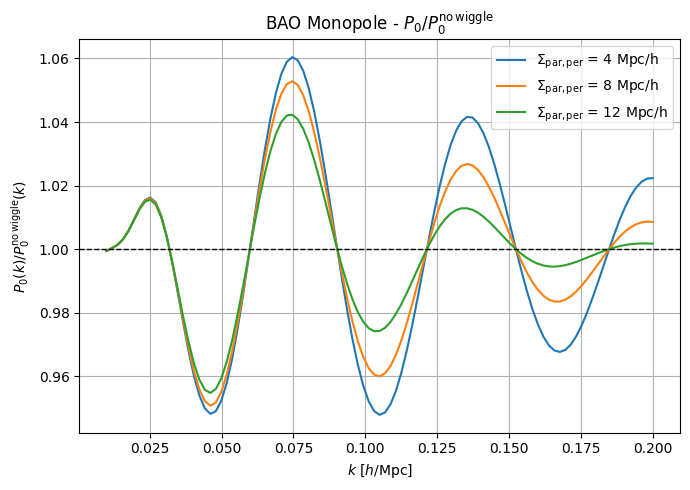

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from desilike import setup_logging
from desilike.theories.galaxy_clustering import BAOPowerSpectrumTemplate, DampedBAOWigglesTracerPowerSpectrumMultipoles

# --- Setup ---
setup_logging()

# Cosmology & templates
z = 0.3
template_w = BAOPowerSpectrumTemplate(z=z, fiducial='DESI', apmode='qiso')
template_now = BAOPowerSpectrumTemplate(z=z, fiducial='DESI', apmode='qiso', only_now=True)

# --- Initialize theories ---
theory_w = DampedBAOWigglesTracerPowerSpectrumMultipoles(template=template_w, ells=(0,))
theory_w.init.update(broadband='pcs')

theory_now = DampedBAOWigglesTracerPowerSpectrumMultipoles(template=template_now, ells=(0,))
theory_now.init.update(broadband='pcs')

# --- Parameters ---
b1 = 2.0
qiso = 1.0
damping_values = [4., 8., 12.]  # in Mpc/h

# --- Plot ---
fig, ax = plt.subplots(figsize=(7, 5))

# no-wiggle baseline (no damping needed)
pk_now = theory_now(qiso=qiso, b1=b1, sigmapar=0., sigmaper=0.)

for Sigma in damping_values:
    pk = theory_w(qiso=qiso, b1=b1, sigmapar=Sigma, sigmaper=Sigma)
    ratio = pk[0] / pk_now[0]
    ax.plot(theory_w.k, ratio, label=fr'$\Sigma_{{\rm par,per}}$ = {Sigma:.0f} Mpc/h')

ax.axhline(1, color='k', linestyle='--', lw=1)  # reference line at 1
ax.set_xlabel(r'$k\ [h/\mathrm{Mpc}]$')
ax.set_ylabel(r'$P_0(k) / P_0^{\rm no\,wiggle}(k)$')
ax.set_title(r'BAO Monopole - $P_0/P_0^{\rm no\,wiggle}$')
ax.grid(True)
ax.legend()
plt.tight_layout()
plt.show()

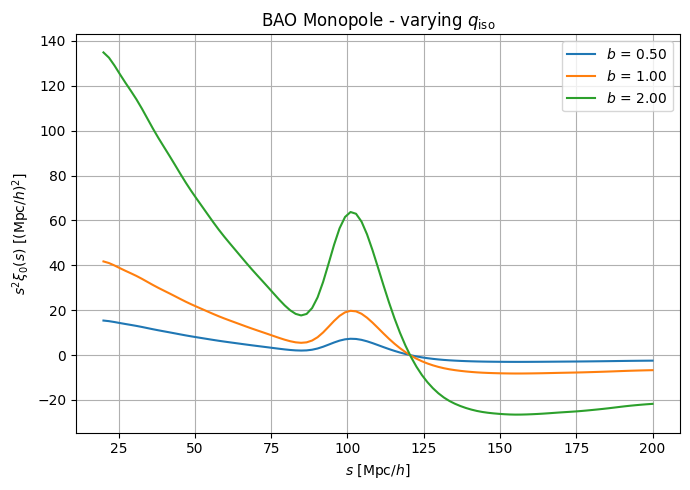

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from desilike import setup_logging
from desilike.theories.galaxy_clustering import BAOPowerSpectrumTemplate, FlexibleBAOWigglesTracerCorrelationFunctionMultipoles

# --- Setup ---
setup_logging()

# Cosmology & template
z = 0.3
template = BAOPowerSpectrumTemplate(z=z, fiducial='DESI', apmode='qiso')  # isotropic scaling

# Define BAO theory for xi_ell
theory = FlexibleBAOWigglesTracerCorrelationFunctionMultipoles(
    template=template,
    ells=(0,),             # monopole only
    broadband='pcs2',
    wiggles='pcs'
)

# --- Parameters ---
bias = [0.5, 1.0, 2.0]  # qiso values

# --- Plot ---
plt.figure(figsize=(7, 5))
for b1 in bias:
    xi = theory(qiso=1, b1=b1)      # <-- pass scalar
    plt.plot(theory.s, theory.s**2 * xi[0], label=fr'$b$ = {b1:.2f}')

# Styling
plt.xlabel(r'$s\ [\mathrm{Mpc}/h]$')
plt.ylabel(r'$s^2 \xi_0(s)\ [(\mathrm{Mpc}/h)^2]$')
plt.title('BAO Monopole - varying $q_\mathrm{iso}$')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Compute BAO for DESI

In [14]:
import numpy as np
from pycorr import TwoPointCorrelationFunction

from desilike.theories.galaxy_clustering import DampedBAOWigglesTracerCorrelationFunctionMultipoles, BAOPowerSpectrumTemplate
from desilike.observables.galaxy_clustering import TracerCorrelationFunctionMultipolesObservable
from desilike.observables import ObservableCovariance
from desilike.likelihoods import ObservablesGaussianLikelihood
from desilike.samplers import EmceeSampler #, NUTSSampler
from desilike.samples import Chain, plotting
from desilike import setup_logging

setup_logging()


def corr_fn(tracer, zrange):
    # Use "official" correlation functions
    return f'/n/home12/cgarciaquintero/DESI/tutorial/day2_bao/data/allcounts_{tracer}_GCcomb_z{zrange[0]:.1f}-{zrange[1]:.1f}.npy'


def cov_fn(tracer, zrange):
    # RascalC covariance from Misha!
    # Reference: https://arxiv.org/abs/2404.03007
    return f'/n/home12/cgarciaquintero/DESI/tutorial/day2_bao/data/covariance_correlation_{tracer}_GCcomb_z{zrange[0]:.1f}-{zrange[1]:.1f}_default_FKP_lin.npy'


def chain_fn(tracer, zrange):
    # Where to save BAO chains
    return f'/n/home12/cgarciaquintero/DESI/tutorial/day2_bao/chains/chain_{tracer}_GCcomb_z{zrange[0]:.1f}-{zrange[1]:.1f}.npy'

In [15]:
tracer = 'LRG'
zrange = (0.4, 0.6)
iso = False
# load 2pt measurements
data = TwoPointCorrelationFunction.load(corr_fn(tracer, zrange))
# load covariance
covariance = ObservableCovariance.load(cov_fn(tracer, zrange))
# effective redshift of measurements?
z = 0.51

# define template
template = BAOPowerSpectrumTemplate(z=z, apmode='qiso' if iso else 'qisoqap')
# define theory
theory = DampedBAOWigglesTracerCorrelationFunctionMultipoles(template=template, mode='recsym', broadband='pcs2')
# define priors on damping parameters
sigmapar, sigmaper, sigmas = (6., 2.), (3., 1.), (2., 2.)
for name, sigma in zip(['sigmapar', 'sigmaper', 'sigmas'], [sigmapar, sigmaper, sigmas]):
    theory.init.params[name].update(prior={'dist': 'norm', 'loc': sigma[0], 'scale': sigma[1], 'limits': [0., 20.]}, fixed=False)
    
if iso: 
    slim = {0: (50., 150., 4.)}
else: 
    slim = {0: (48., 152., 4.), 2: (48., 152., 4.)}

# define observable object
observable = TracerCorrelationFunctionMultipolesObservable(data=data, covariance=covariance,
                                                               slim=slim, wmatrix={'resolution': 1}, theory=theory)
# build likelihood
likelihood = ObservablesGaussianLikelihood(observable)

# Solve analytically for broadband parameters
for param in likelihood.all_params.select(basename=['al*_*', 'bl*_*']):
    param.update(derived='.best')

[000016.54] [0/1] 11-04 00:04  TwoPointEstimator         INFO     Loading /n/home12/cgarciaquintero/DESI/tutorial/day2_bao/data/allcounts_LRG_GCcomb_z0.4-0.6.npy.
[000022.79] [0/1] 11-04 00:04  ObservableCovariance      INFO     Loading /n/home12/cgarciaquintero/DESI/tutorial/day2_bao/data/covariance_correlation_LRG_GCcomb_z0.4-0.6_default_FKP_lin.npy.


/n/home12/cgarciaquintero/.conda/envs/cosmodesi/lib/python3.10/site-packages/numpy/lib/polynomial.py:1338: FutureWarning: In the future extra properties will not be copied across when constructing one poly1d from another
  other = poly1d(other)
/n/home12/cgarciaquintero/.conda/envs/cosmodesi/lib/python3.10/site-packages/cosmoprimo/eisenstein_hu.py:25: UserWarning: EisensteinHuNoWiggleEngine cannot cope with massive neutrinos
  warnings.warn('{} cannot cope with massive neutrinos'.format(self.__class__.__name__))


In [16]:
# Maximize the posterior
from desilike.profilers import MinuitProfiler

profiler = MinuitProfiler(likelihood, seed=42)
profiles = profiler.maximize()

[000035.45] [0/1] 11-04 00:04  MinuitProfiler            INFO     Varied parameters: ['qiso', 'qap', 'b1', 'dbeta', 'sigmas', 'sigmapar', 'sigmaper'].
[000040.00] [0/1] 11-04 00:04  MinuitProfiler            INFO     Successfully jit input likelihood.


In [17]:
# Fitting result and plot
print(profiles.to_stats(tablefmt='pretty'))
likelihood(**profiles.bestfit.choice(input=True))

+--------------------------------------+--------+---------+-------+
| chi2 / (52 - 13) = 37.79 / 39 = 0.97 | varied | bestfit | error |
+--------------------------------------+--------+---------+-------+
|                 qiso                 |  True  |  0.982  | 0.012 |
|                 qap                  |  True  |  0.920  | 0.038 |
|                  b1                  |  True  |  2.005  | 0.092 |
|                dbeta                 |  True  |  1.30   | 0.59  |
|                sigmas                |  True  |   1.9   |  1.8  |
|               sigmapar               |  True  |   5.8   |  1.6  |
|               sigmaper               |  True  |  3.03   | 0.95  |
|                al2_0                 |  True  |   2.3   |       |
|                al2_1                 |  True  |  -0.38  |       |
|                bl0_0                 |  True  | -0.0034 |       |
|                bl0_2                 |  True  |  0.018  |       |
|                bl2_0                 |  True  

Array(-18.89547113, dtype=float64)

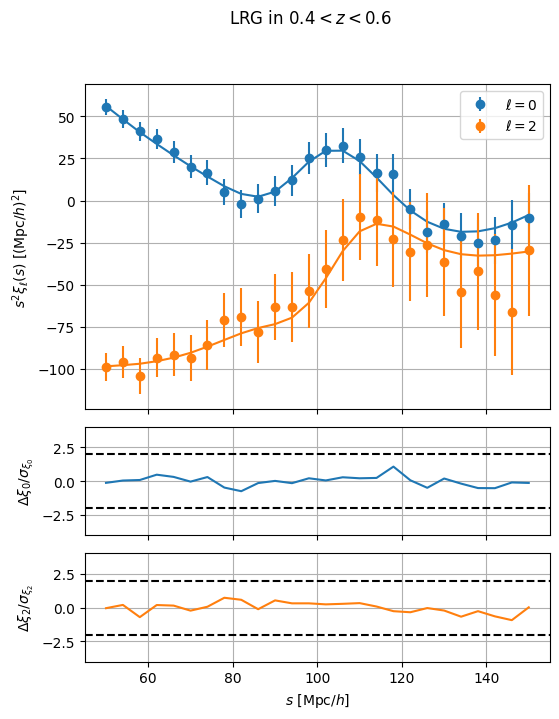

In [18]:
fig = observable.plot(show=False)
fig.suptitle(f'{tracer} in ${zrange[0]:.1f} < z < {zrange[1]:.1f}$')

for param in likelihood.all_params.select(basename=['al*_*', 'bl*_*']):
    param.update(derived='.prec')

In [19]:
nchains = 2
from desilike.samplers import NUTSSampler
# Use No U-Turn Sampler, relies on the likelihood gradient
sampler = NUTSSampler(likelihood, seed=42, chains=nchains)

[000055.14] [0/1] 11-04 00:04  NUTSSampler               INFO     Varied parameters: ['qiso', 'qap', 'b1', 'dbeta', 'sigmas', 'sigmapar', 'sigmaper'].


In [20]:
chains = sampler.run(min_iterations=100, check={'max_eigen_gr': 0.03, 'min_ess': 300})

[000075.88] [0/1] 11-04 00:05  NUTSSampler               INFO     Successfully vmap input likelihood.
[000076.93] [0/1] 11-04 00:05  NUTSSampler               INFO     Successfully jit input likelihood.
[000117.13] [0/1] 11-04 00:05  NUTSSampler               INFO     Using hyperparameters: {'step_size': Array(0.44859471, dtype=float64, weak_type=True), 'inverse_mass_matrix': Array([1.45989459e-04, 1.70738627e-03, 9.07897901e-03, 2.69673116e-02,
       3.14811660e+00, 2.52203713e+00, 8.41283885e-01], dtype=float64), 'max_num_doublings': 10}.
[000135.85] [0/1] 11-04 00:06  NUTSSampler               INFO     Diagnostics:
[000135.91] [0/1] 11-04 00:06  Diagnostics               INFO     - max eigen Gelman-Rubin - 1 is 0.61; not < 0.03.
[000135.94] [0/1] 11-04 00:06  Diagnostics               INFO     - max diag Gelman-Rubin - 1 is 0.439.


/n/home12/cgarciaquintero/.conda/envs/cosmodesi/lib/python3.10/site-packages/jax/_src/numpy/lax_numpy.py:3961: UserWarning: 'kind' argument to argsort is ignored; only 'stable' sorts are supported.
  warnings.warn("'kind' argument to argsort is ignored; only 'stable' sorts "


[000136.51] [0/1] 11-04 00:06  Diagnostics               INFO     - max diag Gelman-Rubin - 1 at 1.0 sigmas is 1.29.
[000136.57] [0/1] 11-04 00:06  Diagnostics               INFO     - max Geweke is 1.41.
[000136.57] [0/1] 11-04 00:06  Diagnostics               INFO     - Geweke p-value is 0.274.
[000136.65] [0/1] 11-04 00:06  Diagnostics               INFO     - effective sample size = (150 iterations / integrated autocorrelation time) is 18.5; not > 300.
[000140.67] [0/1] 11-04 00:06  NUTSSampler               INFO     Diagnostics:
[000140.70] [0/1] 11-04 00:06  Diagnostics               INFO     - max eigen Gelman-Rubin - 1 is 0.13; not < 0.03.
[000140.72] [0/1] 11-04 00:06  Diagnostics               INFO     - max diag Gelman-Rubin - 1 is 0.0686.
[000140.82] [0/1] 11-04 00:06  Diagnostics               INFO     - max diag Gelman-Rubin - 1 at 1.0 sigmas is 0.73.
[000140.83] [0/1] 11-04 00:06  Diagnostics               INFO     - max Geweke is 0.832.
[000140.84] [0/1] 11-04 00:06  Di

In [21]:
chain = Chain.concatenate([chain.remove_burnin(0.3) for chain in chains[::10]])
chain.attrs['zeff'] = z
chain.save(chain_fn(tracer, zrange))

[000187.67] [0/1] 11-04 00:06  Chain                     INFO     Saving /n/home12/cgarciaquintero/DESI/tutorial/day2_bao/chains/chain_LRG_GCcomb_z0.4-0.6.npy.


Removed no burn in


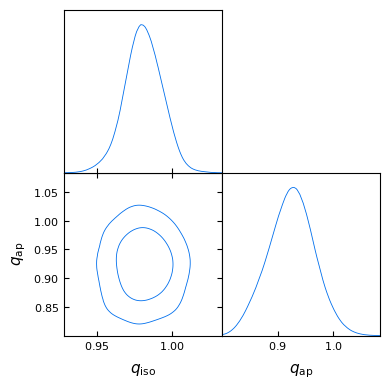

In [30]:
%matplotlib inline
plotting.plot_triangle(chain, params=chain.params(basename=['qiso', 'qap']), show=True)

In [23]:
print(chain.to_stats(tablefmt='pretty'))

+----------+--------+-------+--------+-------+-----------------+-----------------+
|          | argmax | mean  | median |  std  | quantile:1sigma | interval:1sigma |
+----------+--------+-------+--------+-------+-----------------+-----------------+
|   qiso   | 0.981  | 0.981 | 0.981  | 0.013 |  -0.012/+0.012  |  -0.012/+0.013  |
|   qap    | 0.923  | 0.924 | 0.925  | 0.041 |  -0.042/+0.040  |  -0.037/+0.043  |
|    b1    |  2.03  | 2.07  |  2.07  | 0.10  |  -0.098/+0.106  |  -0.103/+0.099  |
|  dbeta   |  1.30  | 1.01  |  1.01  | 0.17  |   -0.20/+0.20   |   -0.13/+0.26   |
|  sigmas  |  1.7   |  2.4  |  2.2   |  1.5  |    -1.6/+1.5    |   -2.23/+0.67   |
| sigmapar |  5.4   |  5.8  |  5.8   |  1.7  |    -1.6/+1.7    |    -1.4/+1.8    |
| sigmaper |  3.41  | 3.01  |  3.00  | 0.92  |   -0.93/+0.91   |   -1.00/+0.81   |
+----------+--------+-------+--------+-------+-----------------+-----------------+


# BAO detection level

In [24]:
# define template
template = BAOPowerSpectrumTemplate(z=z, apmode='qiso' if iso else 'qisoqap')
# define theory
theory = DampedBAOWigglesTracerCorrelationFunctionMultipoles(template=template, mode='recsym', broadband='pcs2')
# define priors on damping parameters
sigmapar, sigmaper, sigmas = (6., 2.), (3., 1.), (2., 2.)
for name, sigma in zip(['sigmapar', 'sigmaper', 'sigmas'], [sigmapar, sigmaper, sigmas]):
    theory.init.params[name].update(prior={'dist': 'norm', 'loc': sigma[0], 'scale': sigma[1], 'limits': [0., 20.]}, fixed=False)
    
if iso: 
    slim = {0: (50., 150., 4.)}
else: 
    slim = {0: (50., 150., 4.), 2: (50., 150., 4.)}

# define observable object
observable = TracerCorrelationFunctionMultipolesObservable(data=data, covariance=covariance,
                                                               slim=slim, wmatrix={'resolution': 1}, theory=theory)
# build likelihood
likelihood_with_bao = ObservablesGaussianLikelihood(observable)

######
# define template
template = BAOPowerSpectrumTemplate(z=z, apmode='qiso' if iso else 'qisoqap', only_now=True)
# define theory
theory = DampedBAOWigglesTracerCorrelationFunctionMultipoles(template=template, mode='recsym', broadband='pcs2')
# define priors on damping parameters
sigmapar, sigmaper, sigmas = (6., 2.), (3., 1.), (2., 2.)
for name, sigma in zip(['sigmapar', 'sigmaper', 'sigmas'], [sigmapar, sigmaper, sigmas]):
    theory.init.params[name].update(prior={'dist': 'norm', 'loc': sigma[0], 'scale': sigma[1], 'limits': [0., 20.]}, fixed=False)
    
if iso: 
    slim = {0: (50., 150., 4.)}
else: 
    slim = {0: (50., 150., 4.), 2: (50., 150., 4.)}

# define observable object
observable = TracerCorrelationFunctionMultipolesObservable(data=data, covariance=covariance,
                                                               slim=slim, wmatrix={'resolution': 1}, theory=theory)
# build likelihood
likelihood_without_bao = ObservablesGaussianLikelihood(observable)

In [25]:
profiler_bao = MinuitProfiler(likelihood_with_bao, seed=42)
profiles_bao = profiler_bao.maximize()

/n/home12/cgarciaquintero/.conda/envs/cosmodesi/lib/python3.10/site-packages/numpy/lib/polynomial.py:1338: FutureWarning: In the future extra properties will not be copied across when constructing one poly1d from another
  other = poly1d(other)
/n/home12/cgarciaquintero/.conda/envs/cosmodesi/lib/python3.10/site-packages/cosmoprimo/eisenstein_hu.py:25: UserWarning: EisensteinHuNoWiggleEngine cannot cope with massive neutrinos
  warnings.warn('{} cannot cope with massive neutrinos'.format(self.__class__.__name__))


[000277.47] [0/1] 11-04 00:08  MinuitProfiler            INFO     Varied parameters: ['qiso', 'qap', 'b1', 'dbeta', 'sigmas', 'sigmapar', 'sigmaper', 'al2_0', 'al2_1', 'bl0_0', 'bl0_2', 'bl2_0', 'bl2_2'].
[000279.16] [0/1] 11-04 00:08  MinuitProfiler            INFO     Successfully jit input likelihood.


In [26]:
profiler_no_bao = MinuitProfiler(likelihood_without_bao, seed=42)
profiles_no_bao = profiler_no_bao.maximize()

[000292.05] [0/1] 11-04 00:08  MinuitProfiler            INFO     Varied parameters: ['qiso', 'qap', 'b1', 'dbeta', 'sigmas', 'al2_0', 'al2_1', 'bl0_0', 'bl0_2', 'bl2_0', 'bl2_2'].
[000293.61] [0/1] 11-04 00:08  MinuitProfiler            INFO     Successfully jit input likelihood.
[000296.14] [0/1] 11-04 00:08  MinuitProfiler            WARNING  covariance failed


In [27]:
print(profiler_bao.profiles.to_stats(tablefmt='pretty'))

+--------------------------------------+--------+---------+--------+
| chi2 / (52 - 13) = 37.79 / 39 = 0.97 | varied | bestfit | error  |
+--------------------------------------+--------+---------+--------+
|                 qiso                 |  True  |  0.982  | 0.012  |
|                 qap                  |  True  |  0.920  | 0.038  |
|                  b1                  |  True  |  2.006  | 0.092  |
|                dbeta                 |  True  |  1.30   |  0.59  |
|                sigmas                |  True  |   1.9   |  1.8   |
|               sigmapar               |  True  |   5.8   |  1.6   |
|               sigmaper               |  True  |  3.03   |  0.95  |
|                al2_0                 |  True  |    2    |   65   |
|                al2_1                 |  True  |  -0.38  |  0.36  |
|                bl0_0                 |  True  | -0.0034 | 0.0016 |
|                bl0_2                 |  True  | 0.0180  | 0.0084 |
|                bl2_0            

In [28]:
print(profiler_no_bao.profiles.to_stats(tablefmt='pretty'))

+--------------------------------------+--------+---------+-------+
| chi2 / (52 - 11) = 80.68 / 41 = 1.97 | varied | bestfit | error |
+--------------------------------------+--------+---------+-------+
|                 qiso                 |  True  |  1.00   | 0.0e0 |
|                 qap                  |  True  |   1.0   | 0.0e0 |
|                  b1                  |  True  |   1.9   | 0.0e0 |
|                dbeta                 |  True  |   1.3   | 0.0e0 |
|                sigmas                |  True  |   2.0   | 0.0e0 |
|                al2_0                 |  True  |  -8.5   | 0.0e0 |
|                al2_1                 |  True  |  -0.27  | 0.0e0 |
|                bl0_0                 |  True  | -0.0019 | 0.0e0 |
|                bl0_2                 |  True  | 0.0090  | 0.0e0 |
|                bl2_0                 |  True  | 0.0050  | 0.0e0 |
|                bl2_2                 |  True  | -0.012  | 0.0e0 |
+--------------------------------------+--------

In [37]:
grid = np.linspace(0.75, 1.25, 31)
profiler_bao.profile(params=['qiso'], grid=grid)
profiler_no_bao.profile(params=['qiso'], grid=grid)

[000410.93] [0/1] 11-04 00:10  MinuitProfiler            INFO     Successfully jit input likelihood.
[000412.33] [0/1] 11-04 00:10  MinuitProfiler            INFO     Successfully jit input likelihood.
[000433.19] [0/1] 11-04 00:10  MinuitProfiler            INFO     Successfully jit input likelihood.
[000435.03] [0/1] 11-04 00:11  MinuitProfiler            INFO     Successfully jit input likelihood.


(0.8, 1.2)

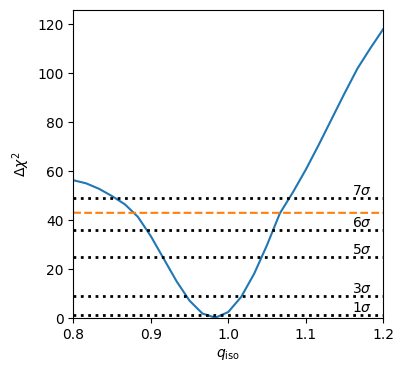

In [38]:
plotting.plot_profile_comparison(profiles_bao, profiles_no_bao, cl=[1,3,5,6,7]);
plt.xlim(0.8,1.2)